In [107]:
import pandas as pd
import matplotlib.pyplot as plt

Notebook overview:
- Load CO2 datasets from Our World in Data and Mauna Loa.
- Preview each table to confirm column names.
- Plot monthly, annual, growth-rate, and daily trend series with labels.
- Add uncertainty bands where available.


In [108]:
df_owid = pd.read_csv("../dataset/co2: Our World In Data/owid-co2-data.csv")
df_ml_monthly_mean = pd.read_csv('../dataset/co2: Mauna Loa/co2_mm_gl.csv', skiprows=38)
df_ml_annual_mean = pd.read_csv("../dataset/co2: Mauna Loa/co2_annmean_gl.csv", skiprows=37)
df_ml_annual_global_rate = pd.read_csv('../dataset/co2: Mauna Loa/co2_gr_gl.csv',skiprows=43)
df_ml_daily_global_trend = pd.read_csv('../dataset/co2: Mauna Loa/co2_trend_gl.csv', skiprows=36)

In [109]:
df_owid.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Monthly mean CO2 (global marine surface):
- Use `average` as the main series.
- `average_unc` provides +/- uncertainty for a shaded band.


In [110]:
df_ml_monthly_mean.head()

,year,month,decimal,average,average_unc,trend,trend_unc
0,1979,1,1979.042,336.56,0.11,335.92,0.09
1,1979,2,1979.125,337.29,0.09,336.26,0.09
2,1979,3,1979.208,337.88,0.11,336.51,0.09
3,1979,4,1979.292,338.32,0.13,336.72,0.10
4,1979,5,1979.375,338.26,0.04,336.71,0.10


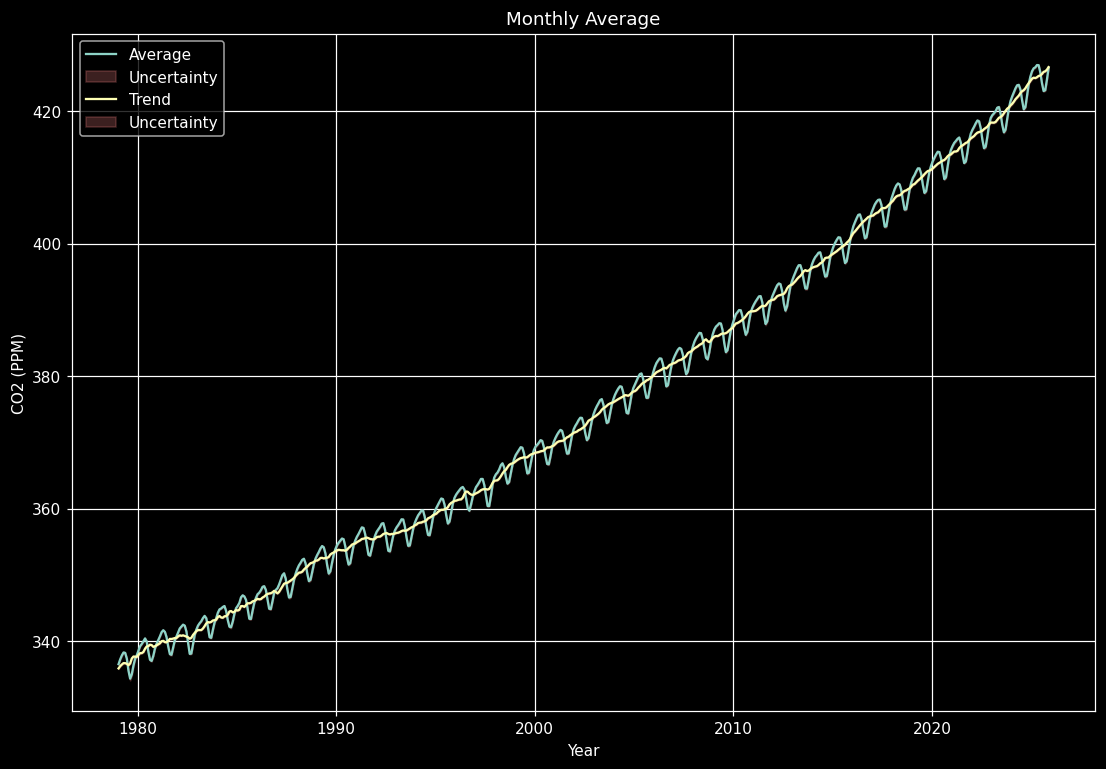

In [111]:
plt.figure(figsize=(12,8))
plt.plot(df_ml_monthly_mean['decimal'],df_ml_monthly_mean['average'], label='Average')
upper = df_ml_monthly_mean['average'] + df_ml_monthly_mean['average_unc']
lower = df_ml_monthly_mean['average'] - df_ml_monthly_mean['average_unc']
plt.fill_between(df_ml_monthly_mean['decimal'],lower,upper, color="lightcoral", alpha=0.25, label="Uncertainty")

plt.plot(df_ml_monthly_mean['decimal'],df_ml_monthly_mean['trend'], label='Trend')
upper = df_ml_monthly_mean['trend'] + df_ml_monthly_mean['trend_unc']
lower = df_ml_monthly_mean['trend'] - df_ml_monthly_mean['trend_unc']
plt.fill_between(df_ml_monthly_mean['decimal'],lower,upper, color="lightcoral", alpha=0.25, label="Uncertainty")

plt.title("Monthly Average")
plt.xlabel("Year")
plt.ylabel("CO2 (PPM)")
plt.grid(True)
plt.legend()
plt.show()

Annual mean CO2 (global marine surface):
- Use `year` and `mean` for the line plot.
- This is a yearly aggregation of the Mauna Loa series.


In [112]:
df_ml_annual_mean.head()

,year,mean,unc
0,1979,336.86,0.10
1,1980,338.91,0.07
2,1981,340.11,0.08
3,1982,340.85,0.03
4,1983,342.53,0.05


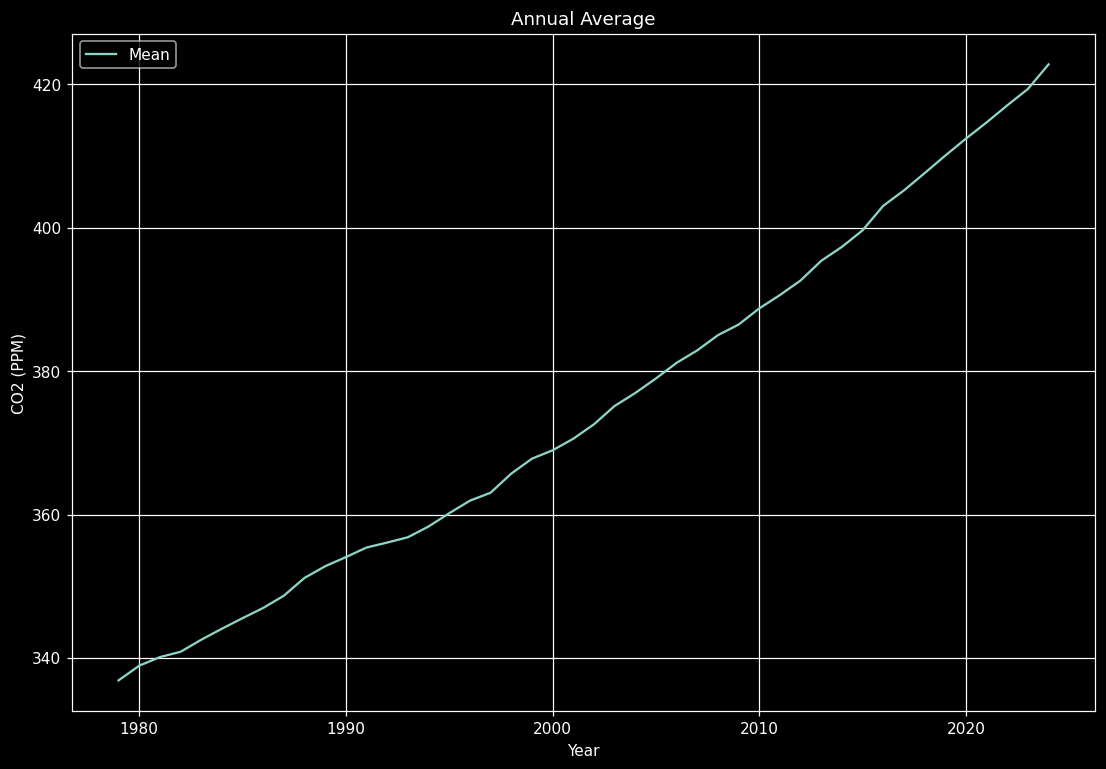

In [113]:
plt.figure(figsize=(12,8))
plt.plot(df_ml_annual_mean['year'],df_ml_annual_mean['mean'], label='Mean')
plt.title("Annual Average")
plt.xlabel("Year")
plt.ylabel("CO2 (PPM)")
plt.grid(True)
plt.legend()
plt.show()

Annual growth rate of CO2:
- `ann inc` is the year-over-year increase.
- Useful to compare acceleration or slowdowns over time.


In [114]:
df_ml_annual_global_rate.head()

,year,ann inc,unc
0,1959,0.96,0.31
1,1960,0.71,0.27
2,1961,0.78,0.27
3,1962,0.56,0.27
4,1963,0.57,0.28


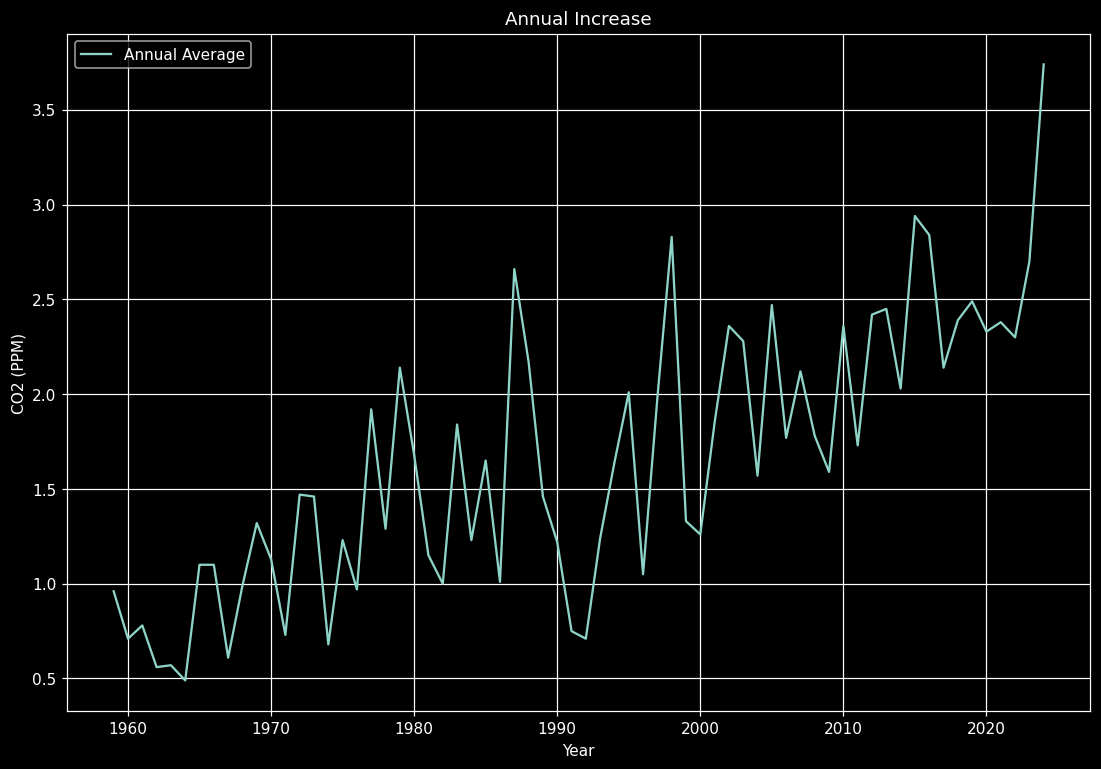

In [115]:
plt.figure(figsize=(12,8))
plt.plot(df_ml_annual_global_rate['year'],df_ml_annual_global_rate['ann inc'], label='Annual Average')
plt.title("Annual Increase")
plt.xlabel("Year")
plt.ylabel("CO2 (PPM)")
plt.grid(True)
plt.legend()
plt.show()

Daily global trend series:
- Plot both `smoothed` and `trend` for context.
- Use an index or datetime column for time on the x-axis.


In [116]:
df_ml_daily_global_trend.head()

,year,month,day,smoothed,trend
0,2016,1,1,402.64,401.62
1,2016,1,2,402.66,401.63
2,2016,1,3,402.67,401.63
3,2016,1,4,402.68,401.64
4,2016,1,5,402.69,401.65


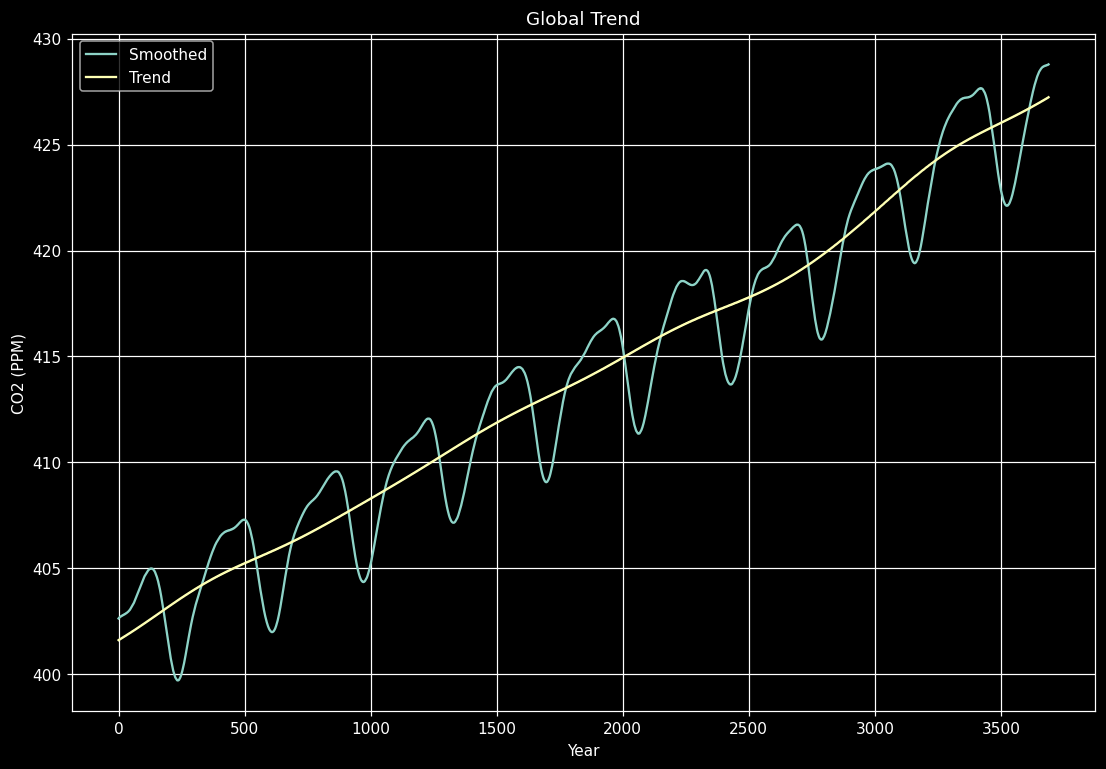

In [117]:
plt.figure(figsize=(12,8))
plt.plot(df_ml_daily_global_trend.index,df_ml_daily_global_trend['smoothed'], label='Smoothed')
plt.plot(df_ml_daily_global_trend.index,df_ml_daily_global_trend['trend'], label='Trend')
plt.title("Global Trend")
plt.xlabel("Year")
plt.ylabel("CO2 (PPM)")
plt.grid(True)
plt.legend()
plt.show()